In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

## All independent

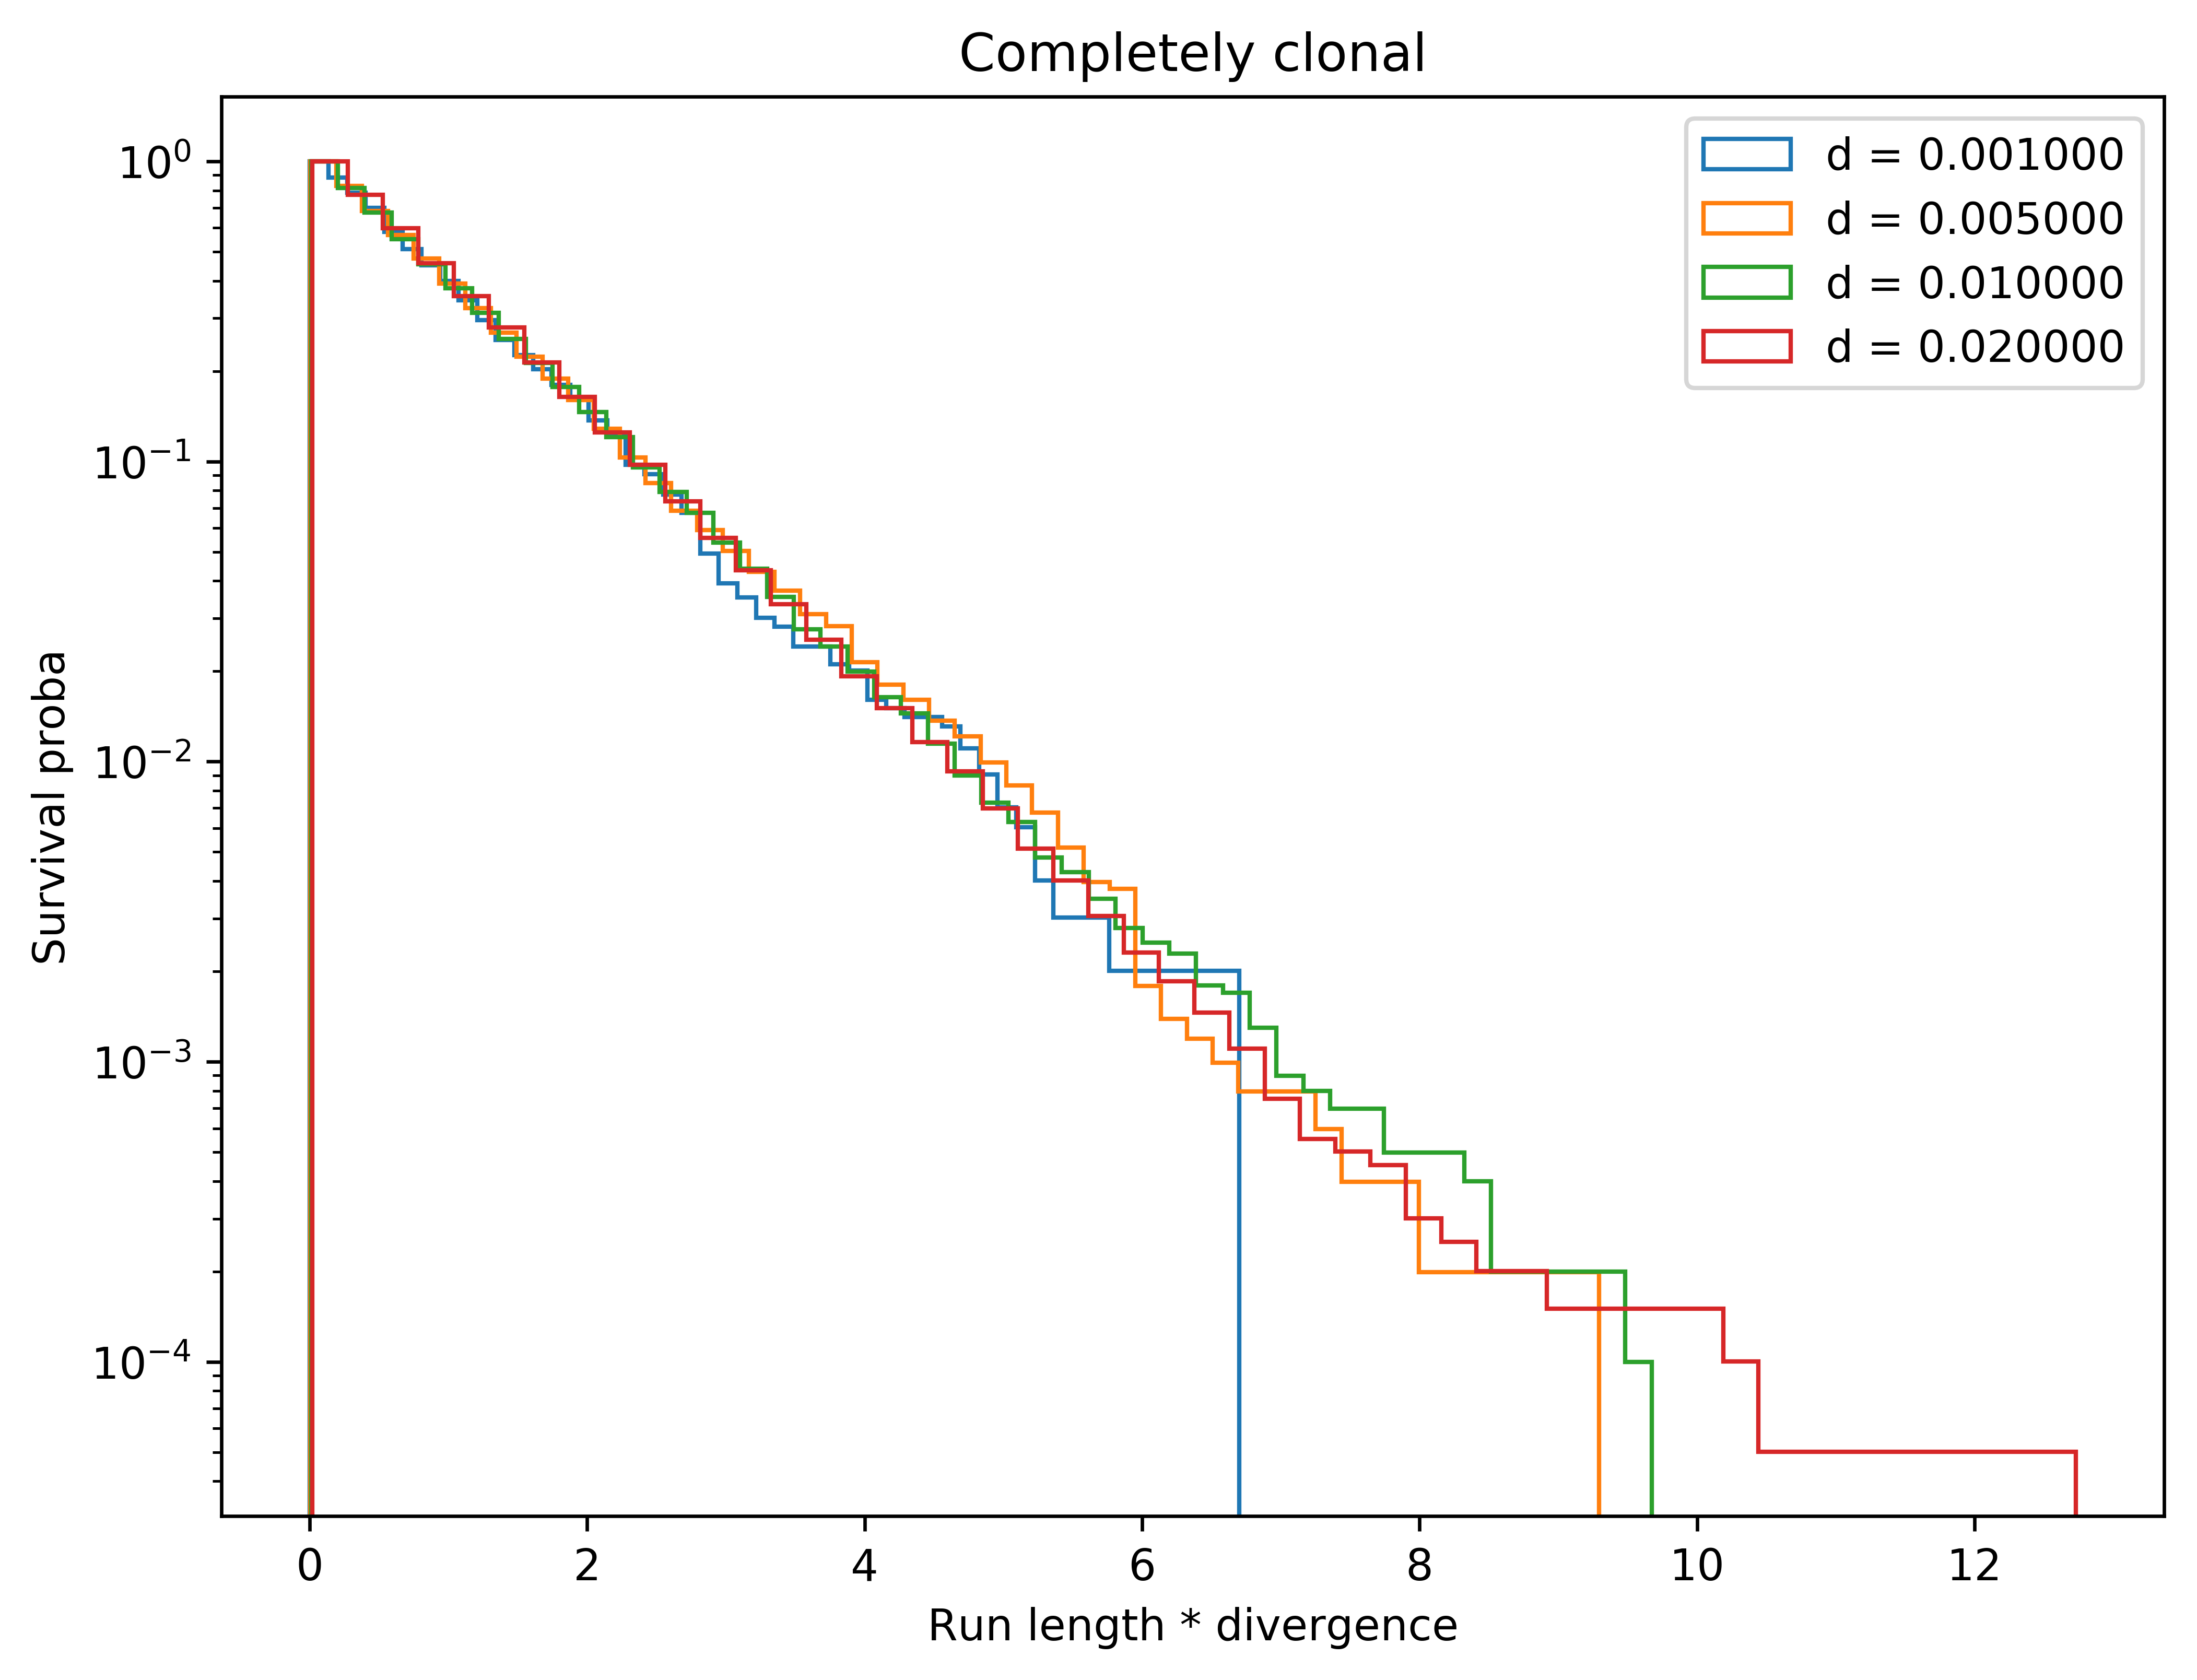

In [8]:
ps = [0.001, 0.005, 0.01, 0.02]
plt.figure(figsize=(8,6), dpi=600)
ax = plt.gca()
ax.set_yscale('log')

for p in ps:
    snps = np.random.binomial(1, p, size=int(1e6))
    locations = np.where(snps == 1)[0]
    run_lengths = locations[1:] - locations[:-1]
    p_emp = sum(snps) / 1e6
    _ = ax.hist(run_lengths * p_emp, density=True, bins=50, cumulative=-1, histtype='step', label='d = %f'%p)
ax.legend()
ax.set_title('Completely clonal')
ax.set_xlabel('Run length * divergence')
ax.set_ylabel('Survival proba')
plt.savefig('clonal.pdf')

## Fixed block sizes

In [10]:
def plot_linear_fit(ax, data_for_fit, fit_range):
    ys = []
    xs = []
    for dat in data_for_fit:
        arr = np.array([(dat[1][i] + dat[1][i+1])/2 for i in range(len(dat[1])-1)])
        ys.append(np.array(dat[0])[(arr > fit_range[0]) & (arr < fit_range[1])]) # TODO: 6 is a eyeballed cutoff
        xs.append(arr[(arr > fit_range[0]) & (arr < fit_range[1])])
    xs = [x for l in xs for x in l]
    ys = [y for l in ys for y in l]
    ys = np.log(ys)
    slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
    x_plot = np.linspace(fit_range[0], fit_range[1], 100)
    ax.plot(x_plot, np.exp(x_plot * slope + intercept), label='Slope = %.2f' % slope)
    return slope

In [10]:
total_len = 1e6
block_size = 1e5

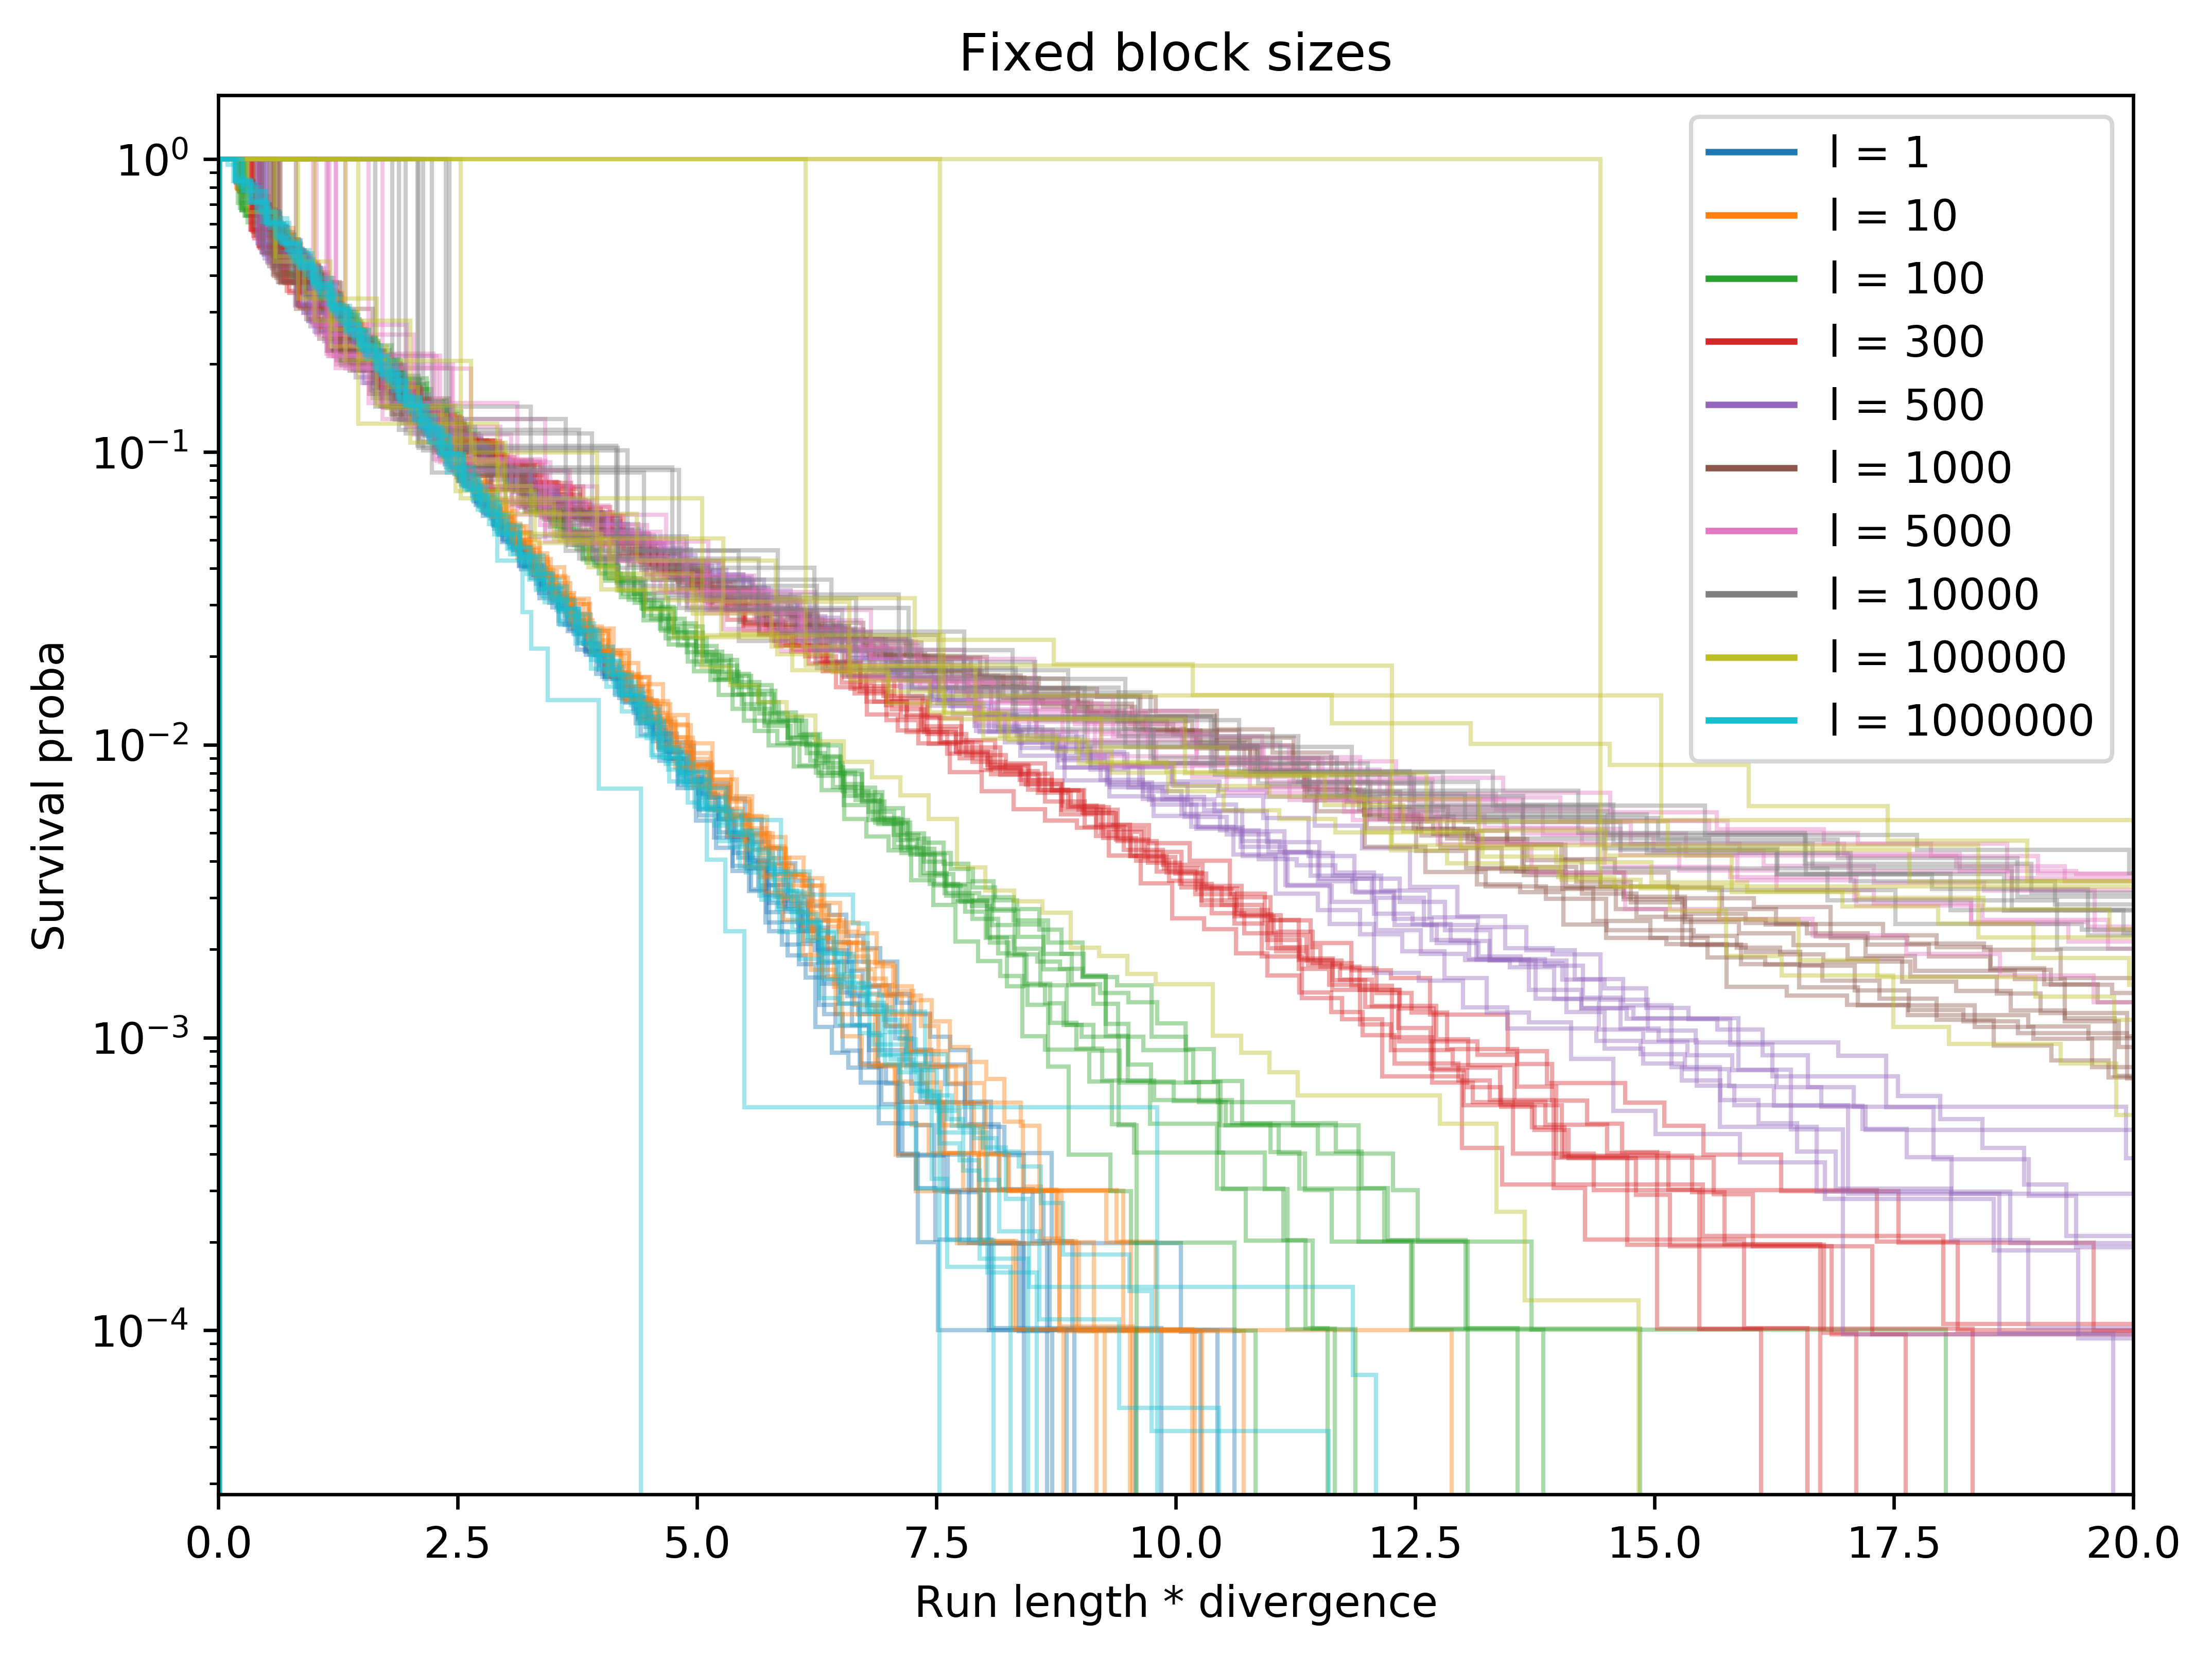

In [2]:
p = 0.01
plt.figure(figsize=(8,6), dpi=600)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xlim([0, 20])

total_len = 1e6
sizes = [1, 10, 100, 300, 500, 1000, 5000, 10000, 100000, 1000000]
fit_ranges = [(0, 8), (0, 8), (4, 10), (4, 10), (4, 10), (4, 10), (4, 10), (4, 10), (4, 10), (0, 8)]

for i in range(len(sizes)):
    block_size = sizes[i]
    c = sns.color_palette()[i]
    fit_range = fit_ranges[i]
    data_for_fit = []
    for j in range(10):
        ps = np.random.exponential(p, size=int(total_len/block_size))
        all_ps = np.repeat(ps, block_size)

        snps = np.random.binomial(1, all_ps)
        locations = np.where(snps == 1)[0]
        run_lengths = locations[1:] - locations[:-1]
        div = float(sum(snps)) / len(snps)
        histo = ax.hist(run_lengths * div, bins=50, cumulative=-1, density=True, histtype='step', color=c, alpha=0.4)
        data_for_fit.append(histo)
    ax.plot([], color=c, label='l = %d'%block_size)
    #plot_linear_fit(ax, data_for_fit, fit_range)
ax.legend()
ax.set_title('Fixed block sizes')
ax.set_xlabel('Run length * divergence')
ax.set_ylabel('Survival proba')
plt.savefig('fixed_block.pdf')

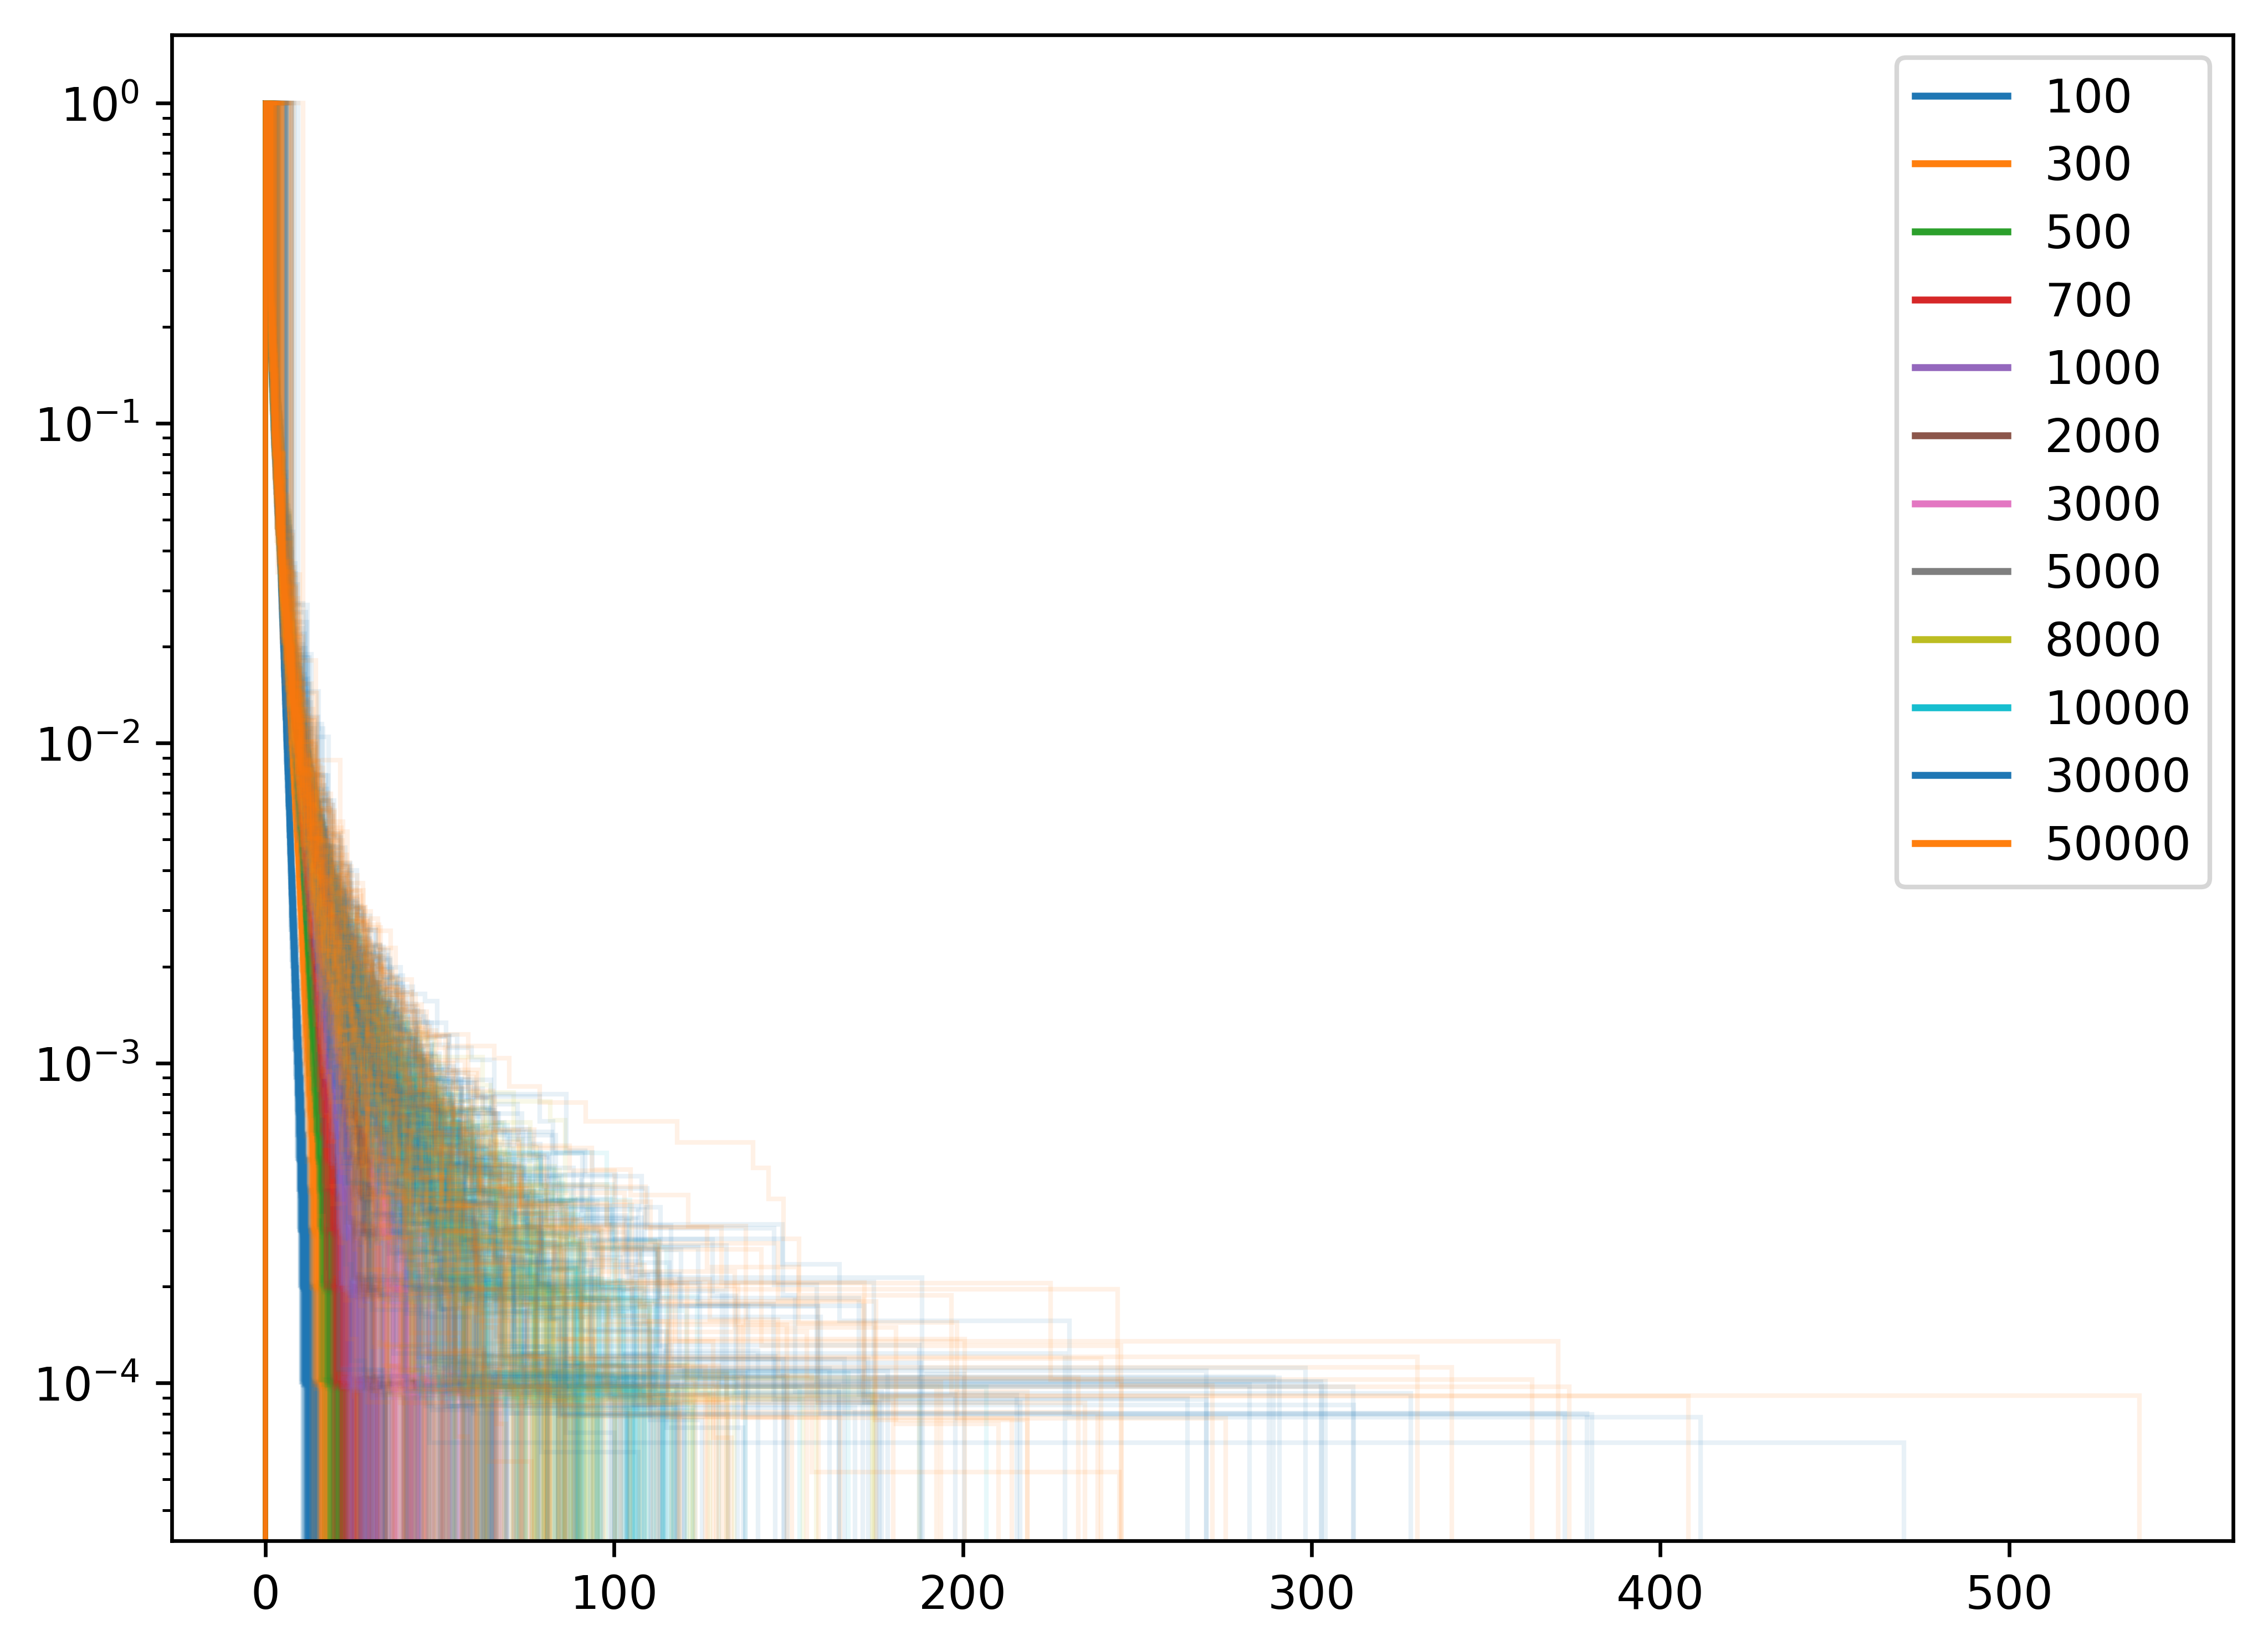

In [146]:
p = 0.01
plt.figure(figsize=(8,6), dpi=600)
ax = plt.gca()
ax.set_yscale('log')
#ax.set_xlim([0, 20])
#ax.set_xscale('log')

total_len = 1e6
sizes = [100, 300, 500, 700,  1000, 2000, 3000, 5000, 8000, 10000, 30000, 50000]

for i in range(len(sizes)):
    block_size = sizes[i]
    c = sns.color_palette()[i % len(sns.color_palette())]
    data_for_fit = []
    for j in range(100):
        ps = np.random.exponential(p, size=int(total_len/block_size))
        all_ps = np.repeat(ps, block_size)

        snps = np.random.binomial(1, all_ps)
        locations = np.where(snps == 1)[0]
        run_lengths = locations[1:] - locations[:-1]
        div = float(sum(snps)) / len(snps)
        histo = ax.hist(run_lengths * div, bins=50, cumulative=-1, density=True, histtype='step', color=c, alpha=0.1)
    ax.plot([], color=c, label='%d'%block_size)
ax.legend()

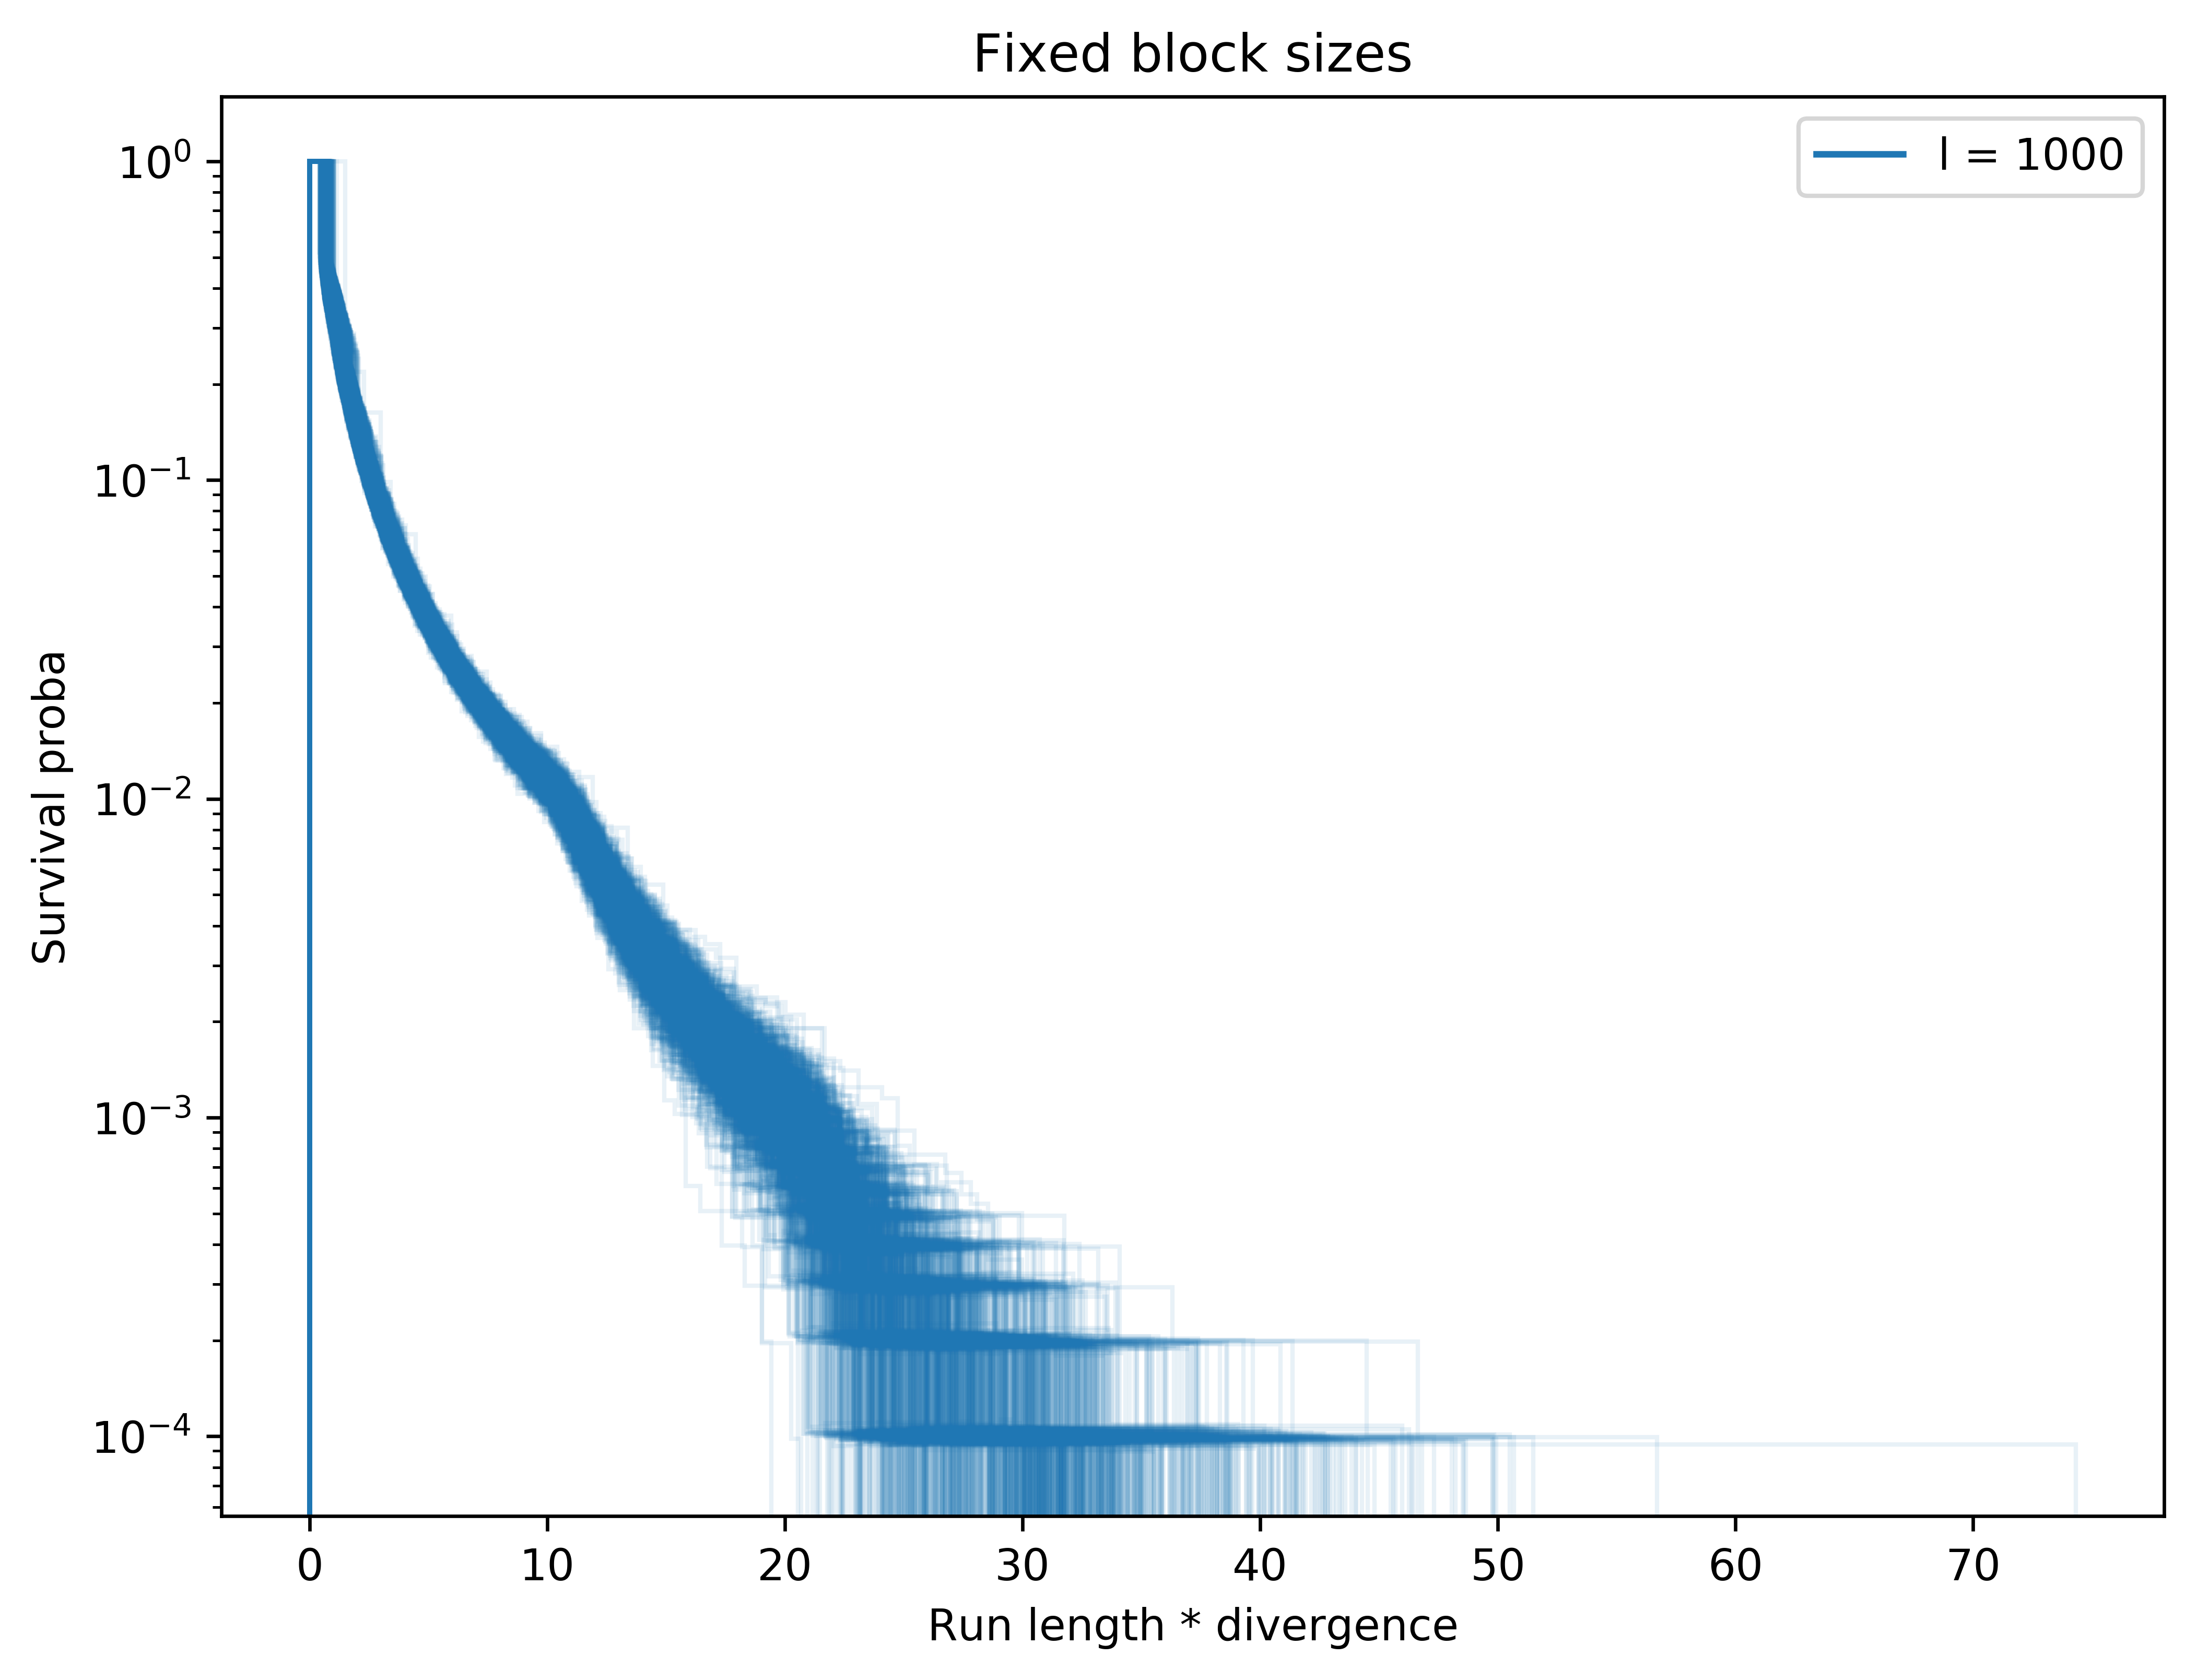

In [3]:
p = 0.01
plt.figure(figsize=(8,6), dpi=600)
ax = plt.gca()
ax.set_yscale('log')
#ax.set_xlim([0, 50])
#ax.set_xscale('log')

total_len = 1e6
sizes = [1000]

for i in range(len(sizes)):
    block_size = sizes[i]
    c = sns.color_palette()[i % len(sns.color_palette())]
    data_for_fit = []
    for j in range(1000):
        ps = np.random.exponential(p, size=int(total_len/block_size))
        all_ps = np.repeat(ps, block_size)

        snps = np.random.binomial(1, all_ps)
        locations = np.where(snps == 1)[0]
        run_lengths = locations[1:] - locations[:-1]
        div = float(sum(snps)) / len(snps)
        histo = ax.hist(run_lengths * div, bins=50, cumulative=-1, density=True, histtype='step', color=c, alpha=0.1)
    ax.plot([], color=c, label='l = %d'%block_size)
ax.legend()
ax.set_title('Fixed block sizes')
ax.set_xlabel('Run length * divergence')
ax.set_ylabel('Survival proba')
plt.savefig('fixed_block_single.pdf')

## Variable block sizes
Exponential distribution of block sizes

In [16]:
rs = [0.1, 0.07, 0.05, 0.03, 0.025, 0.02, 0.015, 0.01, 0.008, 0.005, 0.003, 0.001]#, 5e-5, 1e-5]
ranges = [(0, 10), (0, 10), (2, 12), (2, 12), (2, 12), (2, 12), (2, 12), (2, 12), (2, 12), (2,12), (2,12), (10, 20)]

In [17]:
print(len(rs), len(ranges))

(12, 12)


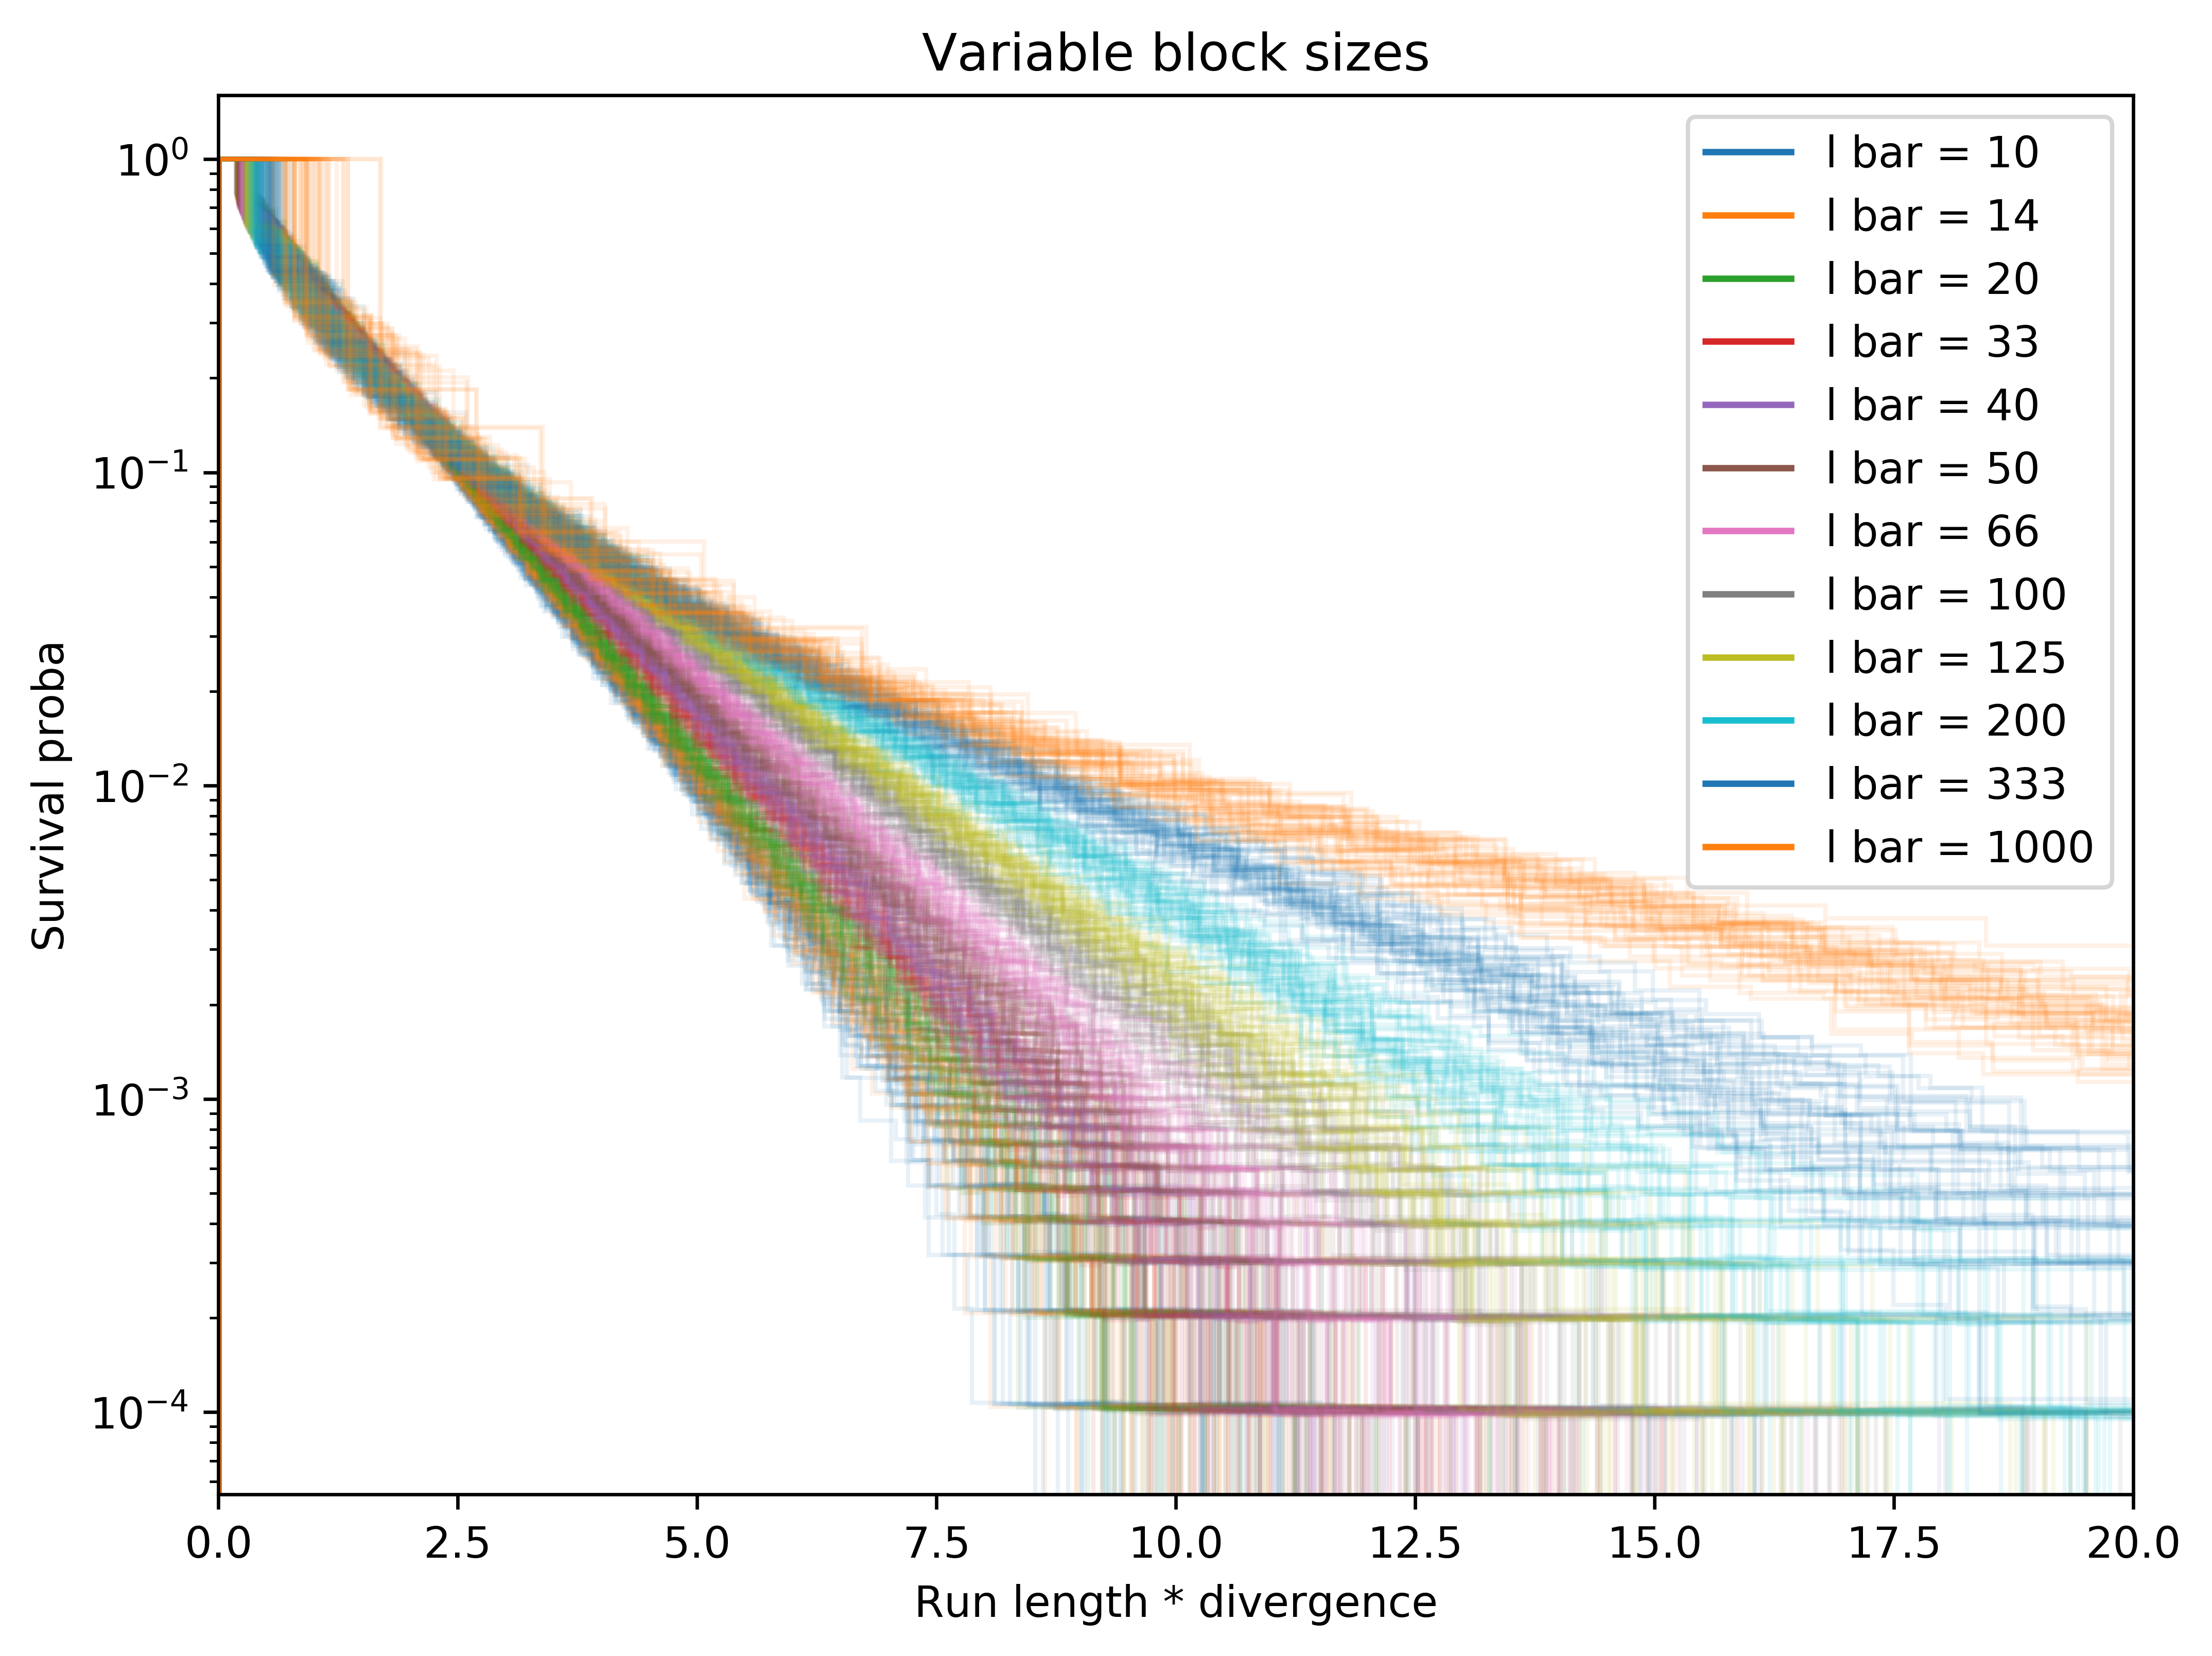

In [5]:
p = 0.01
total_len = 1e6
rs = [0.1, 0.07, 0.05, 0.03, 0.025, 0.02, 0.015, 0.01, 0.008, 0.005, 0.003, 0.001]#, 5e-5, 1e-5]
ranges = [(0, 10), (0, 10), (2, 12), (2, 12), (2, 12), (2, 12), (2, 12), (2, 12), (5, 15), (10,15), (10,15), (10, 20)]
#slopes = []

plt.figure(figsize=(8,6), dpi=600)
ax = plt.gca()
ax.set_xlim([0,20])
ax.set_yscale('log')
lengths = []
for i in range(len(rs)):
    r = rs[i]
    c = sns.color_palette()[i % len(sns.color_palette())]
    data_to_fit = []
    for j in range(50):
        block_len = 1/r
        blocks = np.random.exponential(block_len, size=int(total_len / block_len))
        ps = np.random.exponential(p, size=int(total_len / block_len))
        all_ps = np.repeat(ps, blocks.astype(int))
        snps = np.random.binomial(1, all_ps)
        locations = np.where(snps == 1)[0]
        run_lengths = locations[1:] - locations[:-1]
        div = float(sum(snps)) / len(snps)
        lengths.append(len(snps))
        #data = run_lengths * div * r / (div + r)
        data = run_lengths * div * (r / (div + r))
        data = data[data > 1]
        #histo = ax.hist(run_lengths * div * (r / (div + r)), bins=50, cumulative=-1, density=True, histtype='step', color=c, alpha=0.1)
        histo = ax.hist(run_lengths * div, bins=50, cumulative=-1, density=True, histtype='step', color=c, alpha=0.1)
        data_to_fit.append(histo)
    ax.plot([], color=c, label='l bar = %d'%int(1/r))
    #slopes.append(plot_linear_fit(ax, data_to_fit, ranges[i]))
ax.legend()
ax.set_title('Variable block sizes')
ax.set_xlabel('Run length * divergence')
ax.set_ylabel('Survival proba')
plt.savefig('variable_block_sizes.pdf')

(0.9008441112427402, 0.11050068817297032)


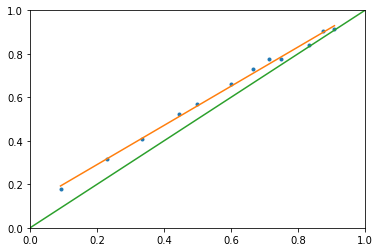

In [22]:
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
fitx = np.array(rs) / (p + np.array(rs))
fity = - np.array(slopes)
ax.plot(fitx, fity, '.')
slope, intercept, r_value, p_value, std_err = stats.linregress(fitx[:], fity[:])
x_plot = np.linspace(min(fitx), max(fitx), 100)
ax.plot(x_plot, x_plot * slope + intercept, label='Slope = %.2f' % slope)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
print(slope, intercept)

In [117]:
fitx / fity

array([0.99050638, 0.96443555, 1.12143757, 0.94951543, 0.93956449,
       0.93273397, 0.88354687, 0.9264377 , 0.87121849])

## Variable block sizes - but with correlation with coalescence time
Algorithm:
1. Generate N coalescence times t_i (or 2 * t * theta = hetero zygosity directly)
2. Generate N block sizes l_i with exponential rate t * rho
3. Generate a genome by repeating each coalescence time l_i times, by the time total lengths reaches L_tot, stop
4. Generate ~L Bernoulli r.v. from the L_tot coalescence times
5. Calculate run size distributions

In [12]:
p_mean = 0.01 # N_e * theta \appox 1 - \exp(-N_e * theta); N_e is the mean coalescence time
r_over_mu = 1
# then, the expected block size is 1/(p_mean * r_over_mu)
L_tot = 1e6
num_samples = 100
r_over_mu_list = [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10]
fitting_ranges = [(15, 30), (10, 20), (10, 20), (5, 15), (5, 10), (5, 10), (5, 10), (5, 10), (5, 10)]

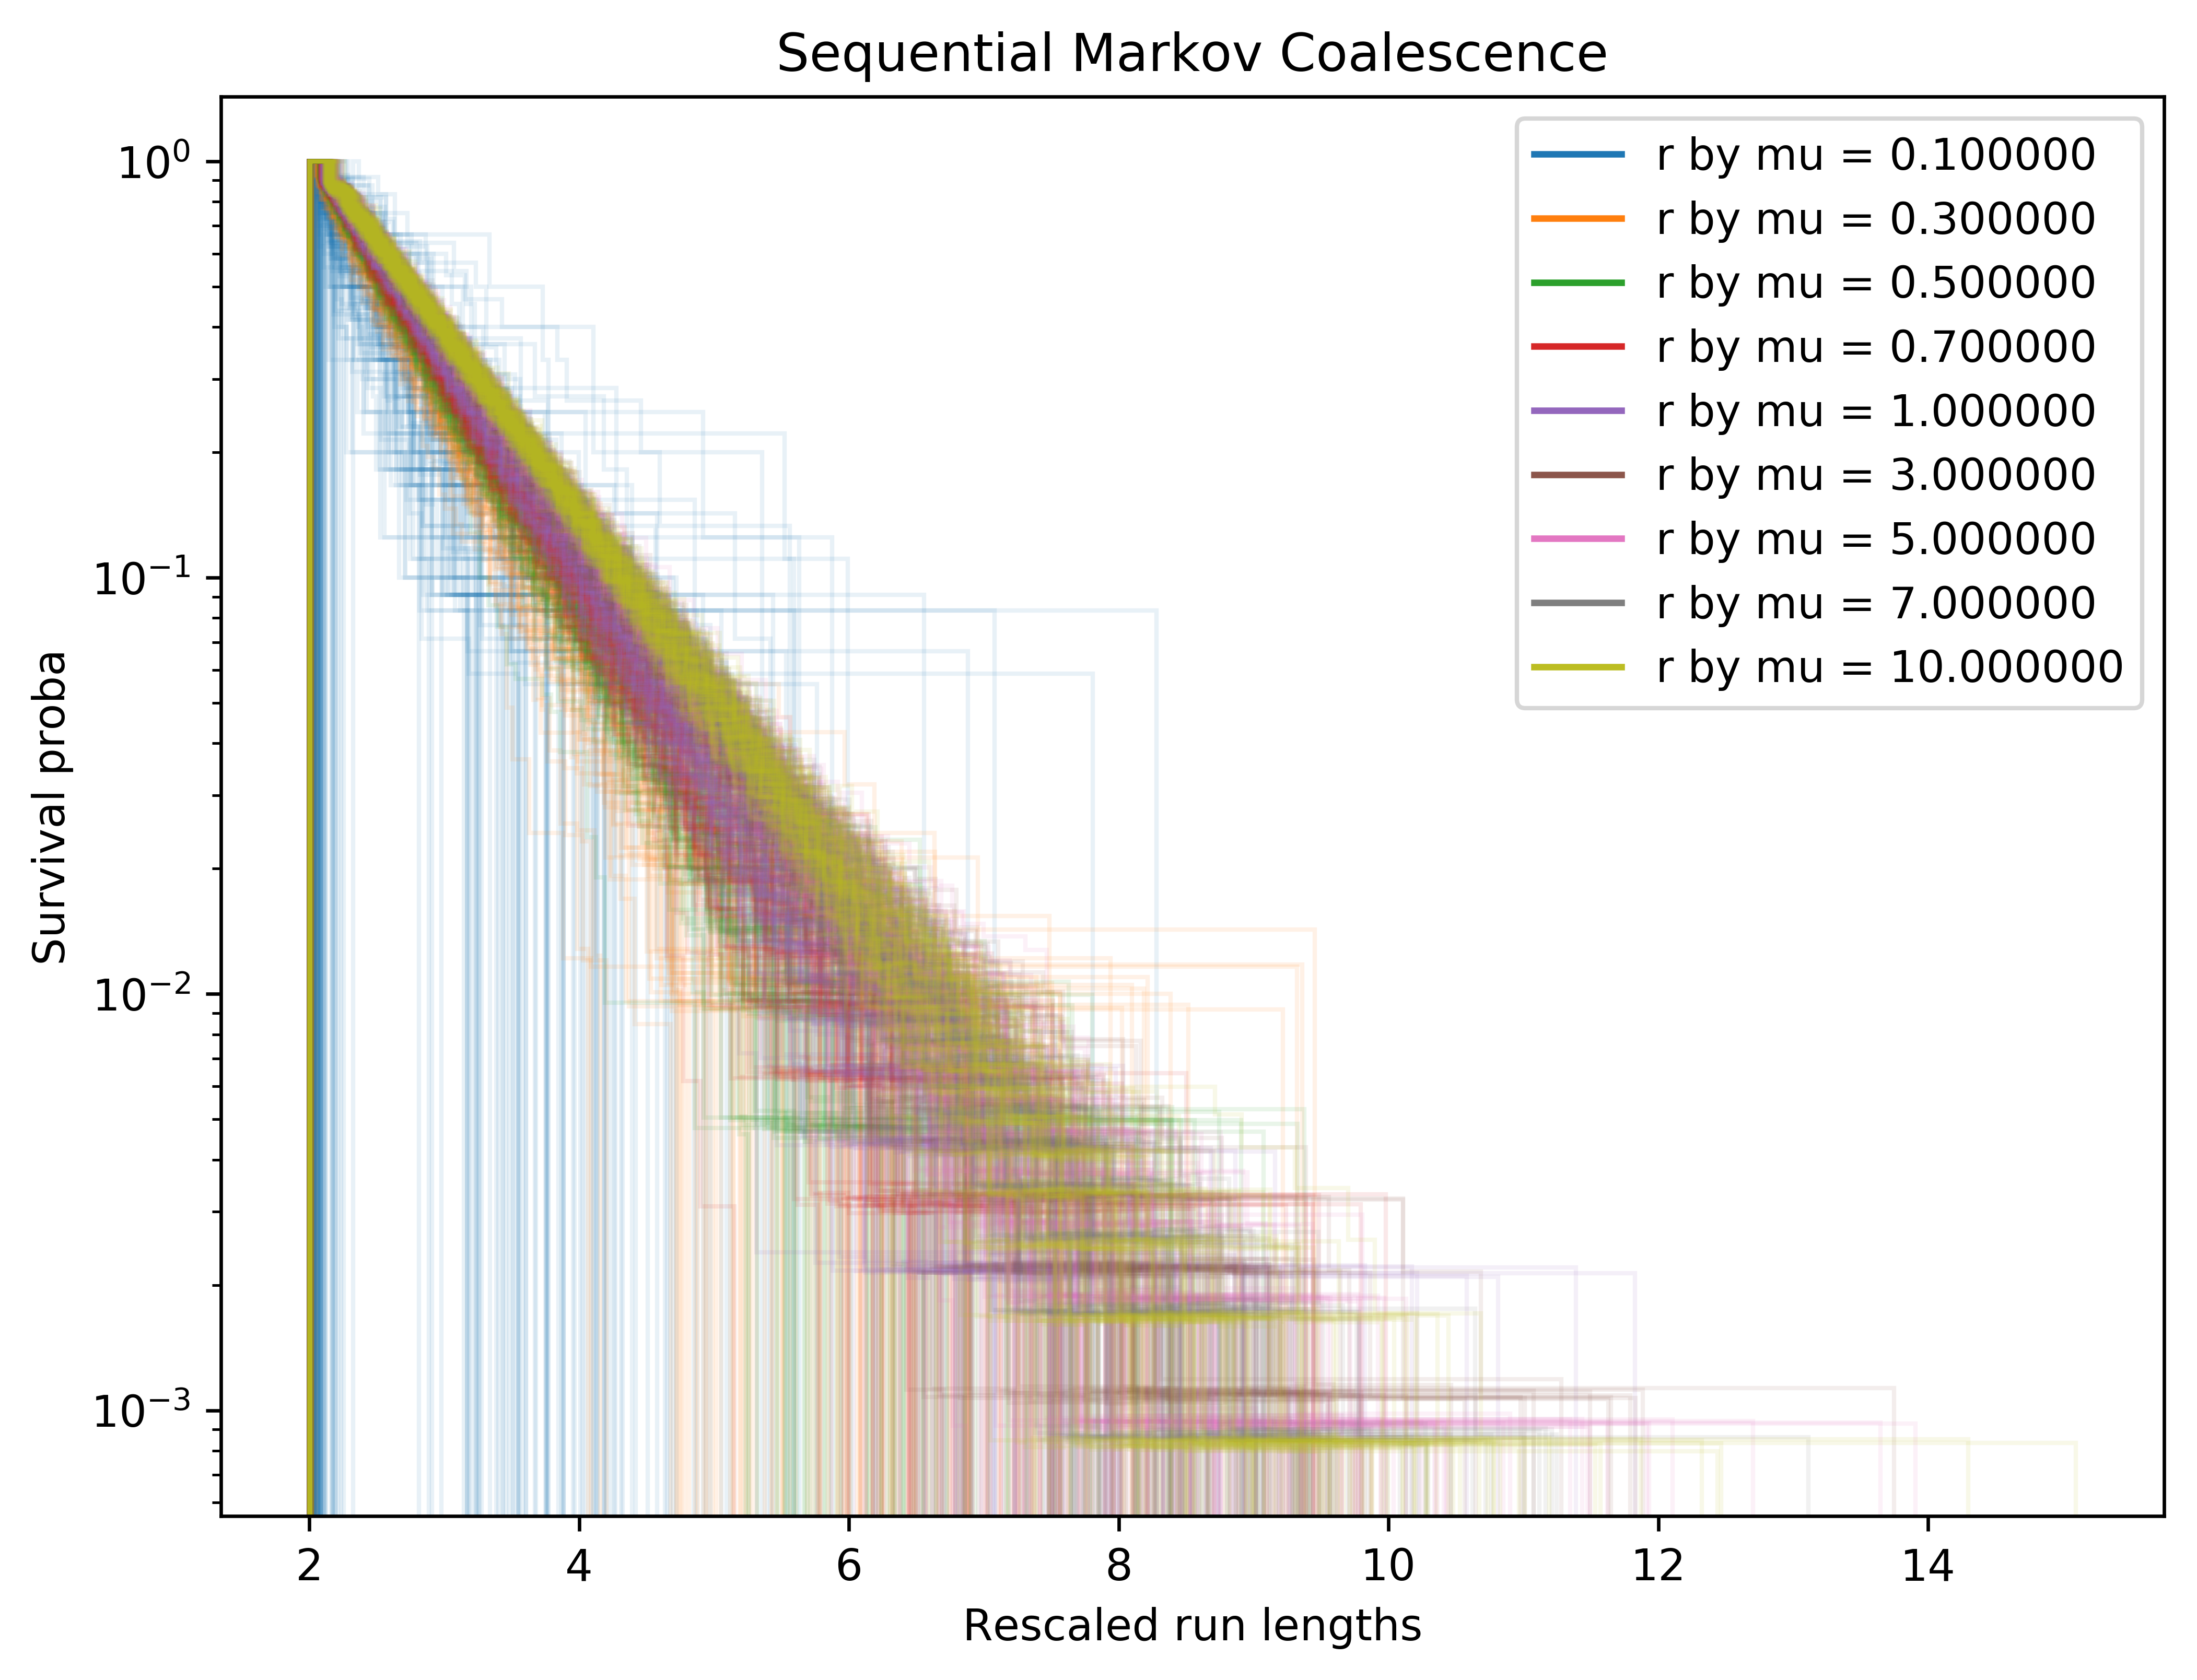

In [21]:
plt.figure(figsize=(8,6), dpi=600)
ax = plt.gca()
ax.set_yscale('log')

#slopes = []
for i in range(len(r_over_mu_list)):
    r_over_mu = r_over_mu_list[i]
    c = sns.color_palette()[i % len(sns.color_palette())]
    N = L_tot * (p_mean * r_over_mu)
    data_to_fit = []

    for j in range(num_samples):
        ps = np.random.exponential(p_mean, size=2*int(N))
        ls = np.random.exponential(1. / (p_mean * r_over_mu), size=2*int(N))
        ls = ls.astype(int)
        cumu_L = np.cumsum(ls)
        end_idx = np.nonzero(cumu_L > L_tot)[0][0]
        all_ps = np.repeat(ps[:end_idx+1], ls[:end_idx+1])
        # now throw Bernoulli tests
        snps = np.random.binomial(1, all_ps)
        locations = np.nonzero(snps == 1)[0]
        run_lengths = locations[1:] - locations[:-1]
        div = float(sum(snps)) / len(snps)
        data = run_lengths * div / (1 + 1./r_over_mu)
        data = data[data > 2]
        histo = ax.hist(data, bins=50, cumulative=-1, density=True, histtype='step', color=c, alpha=0.1)
        data_to_fit.append(histo)

    ax.plot([], label='r by mu = %f'%r_over_mu)
    #slopes.append(plot_linear_fit(ax, data_to_fit, fitting_ranges[i]))
ax.legend()
ax.set_title('Sequential Markov Coalescence')
ax.set_xlabel('Rescaled run lengths')
ax.set_ylabel('Survival proba')
plt.savefig('rbymu_rescaled_thresholded.pdf')

(0.9391550610108397, -0.08488156798671898)


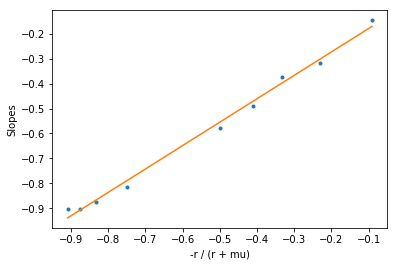

In [19]:
ax = plt.gca()
fitx =  1/(np.array(r_over_mu_list) + 1) - 1
fity = np.array(slopes)
ax.plot(fitx, fity, '.')
slope, intercept, r_value, p_value, std_err = stats.linregress(fitx[:], fity[:])
x_plot = np.linspace(min(fitx), max(fitx), 100)
ax.plot(x_plot, x_plot * slope + intercept, label='Slope = %.2f' % slope)
#plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
print(slope, intercept)
#ax.set_title('')
ax.set_xlabel('-r / (r + mu)')
ax.set_ylabel('Slopes')
plt.savefig('slope_fit_transform.pdf')